In [1]:
>>> from FAdo.fa import *
>>> from FAdo.reex import *
>>> from FAdo.fio import *

In [2]:
>>> m3= DFA()
>>> m3.setSigma(['0','1'])
>>> m3.addState('s1')
>>> m3.addState('s2')
>>> m3.addState('s3')
>>> m3.setInitial(0)
>>> m3.addFinal(0)
>>> m3.addTransition(0, '0', 0)
>>> m3.addTransition(0, '1', 1)
>>> m3.addTransition(1, '0', 2)
>>> m3.addTransition(1, '1', 0)
>>> m3.addTransition(2, '0', 1)
>>> m3.addTransition(2, '1', 2)

In [3]:
>>> m3

DFA((['s1', 's2', 's3'], ['1', '0'], 's1', ['s1'], "[('s1', '1', 's2'), ('s1', '0', 's1'), ('s2', '1', 's1'), ('s2', '0', 's3'), ('s3', '1', 's3'), ('s3', '0', 's2')]"))

In [4]:
>>> m3.evalWordP("011")

True

In [5]:
>>> m3.evalWordP("1011")

False

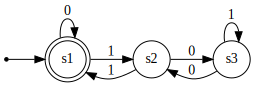

In [6]:
>>> m3.display()

In [7]:
>>> m3 = readFromFile("mul3.fa")[0]

In [8]:
>>> len(m3.States)

3

In [9]:
>>> m3.countTransitions()

6

In [10]:
>>> min=m3.minimalHopcroft()

In [11]:
>>> u = m3 | ~m3

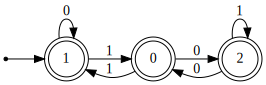

In [12]:
u.renameStates(range(len(u)))
u.display()

In [13]:
>>> m = u.minimal()

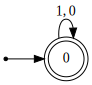

In [14]:
m.display()

In [15]:
>>> m.renameStates(range(len(m)))

DFA((['0'], ['1', '0'], '0', ['0'], "[(0, '1', 0), (0, '0', 0)]"))

In [21]:
>>> u.witness()

'@epsilon'

In [35]:
>>> r = star(disj(regexp("a"),concat(regexp("b"),regexp("a"))))

In [36]:
>>> print r

AttributeError: 'regexp' object has no attribute '_strP'

In [27]:
>>> r = str2regexp("(a+ba)*")

In [26]:
print r

(a + (b a))*


In [28]:
>>> r.compare(str2regexp("(a*(ba)*a*)*"))

True

In [29]:
>>> print m3.regexp()

((0 + ((@epsilon + 0) (0* (@epsilon + 0)))) + ((1 + ((@epsilon + 0) (0* 1))) ((1 (0* 1))* (1 + (1 (0* (@epsilon + 0))))))) + (((1 + ((@epsilon + 0) (0* 1))) ((1 (0* 1))* 0)) ((1 + (0 ((1 (0* 1))* 0)))* (0 ((1 (0* 1))* (1 + (1 (0* (@epsilon + 0))))))))


In [30]:
>>> print m3.reCG()

((0 + (1 1)) + (((1 0) (1 + (0 0))*) (0 1)))*


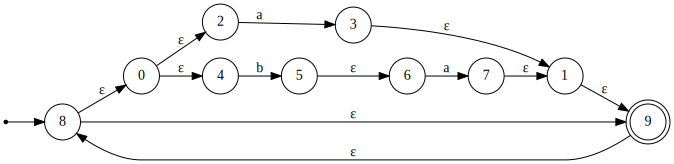

In [31]:
>>> r.nfaThompson().display()

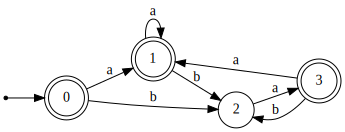

In [32]:
>>> r.nfaPosition().display()

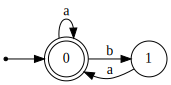

In [33]:
>>> r.nfaPD().display()

In [34]:
>>> r.nfaPosition().toDFA().minimal(complete=False)

DFA((['0', '2'], ['a', 'b'], '0', ['0'], "[('0', 'a', '0'), ('0', 'b', '2'), ('2', 'a', '0')]"))

In [27]:
>>> m3 == m3.reCG().nfaPD().toDFA().minimal()

True